<a href="https://colab.research.google.com/github/pra1608/Risk-Analysis/blob/master/ME780ques3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Question 3: Perform principal component analysis for the given six predictors in the data. 

Importing neccessary libraries

In [8]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt

Reading data file for third question

In [9]:
df = pd.read_csv('/content/drive/MyDrive/ME780Exam/New folder/193109012@iitb.ac.in_Q3.csv')

Normalization of data features using Standard Scalar Library

In [10]:
X = df.values # Numpy array of input data
scaler = StandardScaler()
X = scaler.fit_transform(X) #transforming given data with mean 0 and std 1

Principal component analysis (PCA).

In [11]:
# Defining a function to calculate exaplained variance included in PC
def compute_scores(X):
    pca_variance = []  
    for n in range(1,7):
      # PCA 
      pca = PCA(n_components=n,svd_solver='full')
      pca.fit(X)
      pca_variance.append(np.sum(pca.explained_variance_ratio_))
    return pca_variance


###***Plot of variance contained in principal components vs the number of principal components***


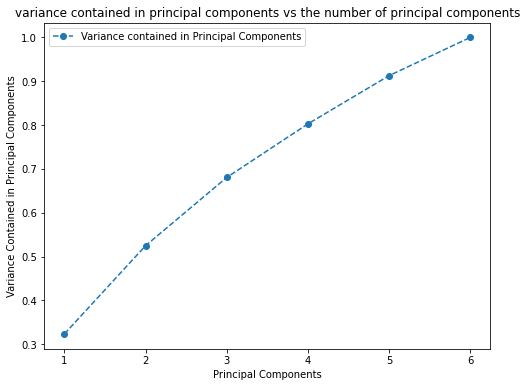

In [12]:
var_data = compute_scores(X)
plt.figure(figsize = (8,6))
#plot of variance contained in principal components vs the number of principal components
plt.plot(np.arange(1,7),var_data,'--o',label = 'Variance contained in Principal Components')
plt.legend()
plt.title("variance contained in principal components vs the number of principal components")
plt.xlabel('Principal Components')
plt.ylabel('Variance Contained in Principal Components')
plt.savefig('variance contained in PCA',dpi = 150)

###***Difference between the actual data (original 6-dimensional data) vs data obtained by the back transformation from a reduced principal components space of five dimensions to 6 dimensions.***

In [13]:
pca = PCA(n_components=5) # PCA analysis for 5 components
X_new = pca.fit_transform(X) # fitting and transforming data X
X_inver_tran = pca.inverse_transform(X_new) # performing inverse transform on the new data
difference = X_inver_tran-X  # calculating Difference
df_diff = pd.DataFrame(difference,columns=df.columns.values)
df_diff.sample(n=3, random_state=0,axis = 0) # random dataset for required output


,X1,X2,X3,X4,X5,X6
18,0.059180,0.080052,0.004492,-0.016104,-0.034946,-0.070164
170,-0.194071,-0.262515,-0.014730,0.052810,0.114599,0.230091
107,-0.078516,-0.106207,-0.005960,0.021366,0.046364,0.093089
